In [22]:
import gradio as gr
import torch
from src.train import train
from sklearn.datasets import load_breast_cancer

In [23]:
X, y = load_breast_cancer(return_X_y=True)
breast = load_breast_cancer()
feature_names = breast.feature_names
model,data = train(X=X, y=y,save=True,model_state=None)

Target labels: [0 1]


lr: 0.001
Epoch 01 | Loss: 0.6830 | Acc: 0.6217 | Val Loss: 0.6862 | Val Acc: 0.6140
Epoch 02 | Loss: 0.6796 | Acc: 0.6217 | Val Loss: 0.6830 | Val Acc: 0.6140
Epoch 03 | Loss: 0.6762 | Acc: 0.6246 | Val Loss: 0.6797 | Val Acc: 0.6140
Epoch 04 | Loss: 0.6728 | Acc: 0.6276 | Val Loss: 0.6763 | Val Acc: 0.6140
Epoch 05 | Loss: 0.6693 | Acc: 0.6334 | Val Loss: 0.6729 | Val Acc: 0.6140
Epoch 06 | Loss: 0.6658 | Acc: 0.6334 | Val Loss: 0.6696 | Val Acc: 0.6140
Epoch 07 | Loss: 0.6623 | Acc: 0.6364 | Val Loss: 0.6663 | Val Acc: 0.6140
Epoch 08 | Loss: 0.6588 | Acc: 0.6422 | Val Loss: 0.6630 | Val Acc: 0.6140
Epoch 09 | Loss: 0.6554 | Acc: 0.6452 | Val Loss: 0.6597 | Val Acc: 0.6316
Epoch 10 | Loss: 0.6520 | Acc: 0.6452 | Val Loss: 0.6565 | Val Acc: 0.6316
Epoch 11 | Loss: 0.6486 | Acc: 0.6481 | Val Loss: 0.6532 | Val Acc: 0.6491
Epoch 12 | Loss: 0.6453 | Acc: 0.6569 | Val Loss: 0.6500 | Val Acc: 0.6579
Epoch 13 | Loss: 0.6420 | Acc: 0.6569 | Val Loss: 0.6467 | Val Acc: 0.6667
Epoch 14 | Loss

Train Accuracy,▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇████
Train Loss,█████▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▁▁
Val Accuracy,▁▁▁▁▁▁▁▁▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██████████
Val Loss,█████▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▁▁
Train Accuracy,0.92082
Train Loss,0.45645
Val Accuracy,0.89474
Val Loss,0.46761


In [24]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [25]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(data["X_test_tensor"])
    y_pred = (y_pred_probs > 0.5).int()

In [26]:
y_pred_np = y_pred.numpy().flatten()
y_true_np = data["y_test_tensor"].numpy().flatten()

print(classification_report(y_true_np, y_pred_np, target_names=["malignant", "benign"]))


              precision    recall  f1-score   support

   malignant       1.00      0.86      0.92        42
      benign       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



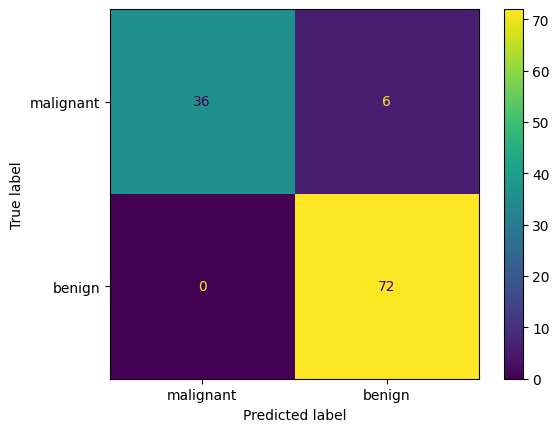

In [27]:
cm = confusion_matrix(y_true_np, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["malignant", "benign"])
disp.plot()

# DEXIRE

In [28]:
from explainer.dexire import get_dexire_rules

In [29]:
rules = get_dexire_rules(model,data)

y_train unique values: [0 1]
class_names: ['malignant', 'benign']
11
feature_11
Symbolic expression: feature_11 <= 0.5
8
feature_8
Symbolic expression: feature_8 <= 0.5
Symbolic expression: feature_8 > 0.5
Symbolic expression: feature_11 > 0.5
2
feature_2
Symbolic expression: feature_2 <= 0.5
Symbolic expression: feature_2 > 0.5
6
feature_6
Symbolic expression: feature_6 <= 0.5
13
feature_13
Symbolic expression: feature_13 <= 0.5
7
feature_7
Symbolic expression: feature_7 <= 0.5
Symbolic expression: feature_7 > 0.5
9
feature_9
Symbolic expression: feature_9 <= 0.5
Symbolic expression: feature_9 > 0.5
Symbolic expression: feature_13 > 0.5
Symbolic expression: feature_6 > 0.5
7
X_7
Symbolic expression: X_7 <= 0.325
22
X_22
Symbolic expression: X_22 <= 0.262
27
X_27
Symbolic expression: X_27 <= 0.338
Symbolic expression: X_27 > 0.338
Symbolic expression: X_22 > 0.262
Symbolic expression: X_7 > 0.325
23
X_23
Symbolic expression: X_23 <= 0.013
Symbolic expression: X_23 > 0.013
8
X_8
Symboli

In [30]:
rules

[IF ((X_27 <= 0.216) AND (X_3 > 0.113)) THEN benign, IF ((X_7 > 0.325) AND (X_23 > 0.013) AND (X_8 <= -1.258)) THEN malignant, IF ((X_27 <= 0.216) AND (X_3 <= 0.113) AND (X_23 <= 0.023) AND (X_2 <= 0.25) AND (X_21 <= 2.218) AND (X_1 > 1.811)) THEN malignant, IF ((X_27 > 0.216) AND (X_12 > -0.662) AND (X_6 > 0.088) AND (X_14 > 2.385)) THEN malignant, IF ((X_27 <= 0.216) AND (X_3 <= 0.113) AND (X_23 <= 0.023) AND (X_2 <= 0.25) AND (X_21 > 2.218)) THEN malignant, IF ((X_7 <= 0.325) AND (X_22 <= 0.262) AND (X_27 <= 0.338)) THEN malignant, IF ((X_7 > 0.325) AND (X_23 <= 0.013)) THEN malignant, IF ((X_27 > 0.216) AND (X_12 <= -0.662)) THEN malignant, IF ((X_7 > 0.325) AND (X_23 > 0.013) AND (X_8 > -1.258)) THEN benign, IF ((X_7 <= 0.442) AND (X_22 <= 0.655) AND (X_5 <= 1.932) AND (X_25 > 1.143)) THEN malignant, IF ((X_7 <= 0.442) AND (X_22 > 0.655)) THEN benign, IF ((X_27 <= 0.216) AND (X_3 <= 0.113) AND (X_23 <= 0.023) AND (X_2 <= 0.25) AND (X_21 <= 2.218) AND (X_1 <= 1.811)) THEN malignant

# CIU

In [31]:
from explainer.ciu import get_explainer_CIU, get_ciu_instance
import pandas as pd

In [32]:
CIU_model = get_explainer_CIU(model, data,output_names=["malignant", "benign"], feature_names=feature_names)

In [33]:
X_test_df = pd.DataFrame(data["X_test"],  columns=feature_names)
res = get_ciu_instance(CIU_model, X_test_df.iloc[[0]])

In [34]:
display(res)

,CI,CU,Cinfl,outname,outval,feature,ymin,ymax,inputs,invals,neutralCU,target_concept,target_inputs
mean radius,0.067036,0.401224,-0.006622,malignant,0.305868,mean radius,0.278971,0.346007,[0],[1.5401261274697042],0.5,None,None
mean texture,0.009962,0.474839,-0.000251,malignant,0.305868,mean texture,0.301138,0.311099,[1],[2.2061414308619542],0.5,None,None
mean perimeter,0.040296,0.376846,-0.004963,malignant,0.305868,mean perimeter,0.290682,0.330978,[2],[1.714787850717993],0.5,None,None
mean area,0.063449,0.546654,0.002960,malignant,0.305868,mean area,0.271183,0.334632,[3],[1.5702600432132583],0.5,None,None
mean smoothness,0.006079,0.313135,-0.001136,malignant,0.305868,mean smoothness,0.303964,0.310043,[4],[-0.26760207311046896],0.5,None,None
mean compactness,0.017514,0.513222,0.000232,malignant,0.305868,mean compactness,0.296879,0.314393,[5],[1.9322741890003872],0.5,None,None
mean concavity,0.039342,0.562541,0.002460,malignant,0.305868,mean concavity,0.283736,0.323078,[6],[1.1249340006323156],0.5,None,None
mean concave points,0.085497,0.409077,-0.007774,malignant,0.305868,mean concave points,0.270893,0.356390,[7],[1.6890119942694124],0.5,None,None
mean symmetry,0.095170,0.566560,0.006335,malignant,0.305868,mean symmetry,0.251948,0.347118,[8],[0.2971187785480267],0.5,None,None
mean fractal dimension,0.011638,0.231949,-0.003120,malignant,0.305868,mean fractal dimension,0.303168,0.314806,[9],[-0.06770616496834349],0.5,None,None


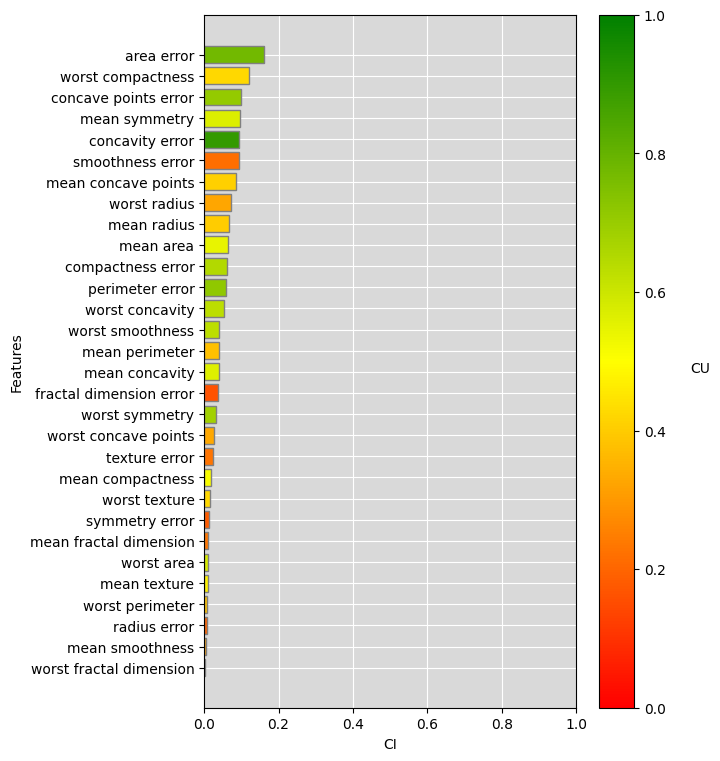

In [35]:
p = CIU_model.plot_ciu(res, figsize=(6,9))

# DEXIRE-EVO

In [36]:
from dexire_evo.ga_engine import GAEngine
from dexire_evo.rule_formatter import format_if_elif_else
from sklearn.metrics import accuracy_score, classification_report
from src.config import Config
from explainer.dexire_evo import get_dexire_evo_rules

In [37]:
best, test_acc, uncov_te, engine = get_dexire_evo_rules(feature_names, model, data)


c:\Users\robin\Desktop\projetsestre\xai-on-the-wall\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitTri' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\robin\Desktop\projetsestre\xai-on-the-wall\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


GEN 001: fid=1.000, preds=3.0, uncov=302.0
GEN 010: fid=1.000, preds=5.0, uncov=294.0
GEN 020: fid=1.000, preds=5.0, uncov=294.0
GEN 030: fid=1.000, preds=5.0, uncov=294.0
GEN 040: fid=1.000, preds=3.0, uncov=280.0
GEN 050: fid=1.000, preds=4.0, uncov=273.0
GEN 060: fid=1.000, preds=8.0, uncov=178.0
GEN 070: fid=1.000, preds=9.0, uncov=119.0
GEN 080: fid=1.000, preds=8.0, uncov=119.0
GEN 090: fid=1.000, preds=7.0, uncov=119.0
GEN 100: fid=1.000, preds=6.0, uncov=119.0
GEN 110: fid=1.000, preds=6.0, uncov=119.0
GEN 120: fid=1.000, preds=6.0, uncov=95.0
GEN 130: fid=1.000, preds=7.0, uncov=84.0
GEN 140: fid=1.000, preds=7.0, uncov=84.0
GEN 150: fid=1.000, preds=7.0, uncov=84.0
GEN 160: fid=1.000, preds=7.0, uncov=84.0
GEN 170: fid=1.000, preds=7.0, uncov=80.0
GEN 180: fid=1.000, preds=7.0, uncov=80.0
GEN 190: fid=1.000, preds=7.0, uncov=80.0
GEN 200: fid=1.000, preds=7.0, uncov=80.0


In [38]:
print("\nRules in IF–ELIF–ELSE form (GA):")
print(format_if_elif_else(best, feature_names, engine.operator_set))


Rules in IF–ELIF–ELSE form (GA):
if mean concavity <= 0.05 AND worst smoothness <= 0.88 AND radius error < 0.39: class = 1
elif worst area >= 0.73 AND mean fractal dimension <= 3.44: class = 0
else mean compactness <= 4.49 AND smoothness error >= 1.63: class = 1


In [39]:
print("\n=== FINAL GA RESULTS ===")
print(f"Fidelity (train vs model): {best.fitness.values[0]:.3f}")
print(f"# Predicates             : {best.fitness.values[1]}")
print(f"Uncovered (train)        : {best.fitness.values[2]}")
print(f"Test accuracy (matched)  : {test_acc:.3f} | Uncov test: {uncov_te}")


=== FINAL GA RESULTS ===
Fidelity (train vs model): 1.000
# Predicates             : 7.0
Uncovered (train)        : 80.0
Test accuracy (matched)  : 0.955 | Uncov test: 25


In [40]:
def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

# Visibility toggle helpers

In [ ]:
def toggle_dataset_file(dataset_mode):
    # Show CSV upload only when "Upload CSV" is selected
    return gr.update(visible=(dataset_mode == "Upload CSV"))


def toggle_model_widgets(model_mode):
    """
    Show model_state_file only for 'Load existing model'
    Show training config (including save_trained_model) only for 'Train new model'
    """
    load_mode = (model_mode == "Load existing model")
    return (
        gr.update(visible=load_mode),       # model_state_file
        gr.update(visible=not load_mode),   # train_cfg_group
    )

# Gradio Interface

In [ ]:
with gr.Blocks(title="XAI on the Wall") as main:
    gr.Markdown("## XAI on the Wall – CIU, DexiRE & DexiRE-Evo")

    with gr.Row():
        with gr.Column(scale=1):
            # ── Dataset section ──
            gr.Markdown("### Dataset")

            dataset_mode = gr.Radio(
                ["Demo breast cancer", "Upload CSV"],
                value="Demo breast cancer",
                label="Dataset source",
            )

            dataset_file = gr.File(
                label="Upload dataset (CSV, last column = target)",
                file_types=[".csv"],
                interactive=True,
                visible=False,  # hidden by default (demo dataset)
            )

            # ── Model section ──
            gr.Markdown("### Model")

            model_mode = gr.Radio(
                ["Train new model", "Load existing model"],
                value="Train new model",
                label="Model source",
            )

            # Model state uploader (only for "Load existing model")
            model_state_file = gr.File(
                label="Model state (.pth) (used if 'Load existing model')",
                file_types=[".pth", ".pt"],
                interactive=True,
                visible=False,  # start hidden; will be set correctly on load
            )

            # Training config block (hidden when loading existing model)
            with gr.Group(visible=False) as train_cfg_group:
                save_trained_model = gr.Checkbox(
                    value=True,
                    label="Save trained model to disk",
                )
                # learning_rate = gr.Number(...)
                # epochs = gr.Number(...)

            test_index = gr.Number(
                value=0,
                precision=0,
                label="Index of test instance to explain (0-based)",
            )

            run_btn = gr.Button("Train / Load & Explain")

        # ── Outputs section ──
        with gr.Column(scale=2):
            gr.Markdown("### CIU")
            ciu_text_out = gr.Textbox(
                label="CIU explanation (raw result)",
                lines=10,
            )
            ciu_plot_out = gr.Plot(label="CIU plot")

            gr.Markdown("### DexiRE")
            dexire_out = gr.Textbox(
                label="DexiRE rules",
                lines=10,
            )

            gr.Markdown("### DexiRE-Evo")
            dexire_evo_out = gr.Textbox(
                label="DexiRE-Evo rules & metrics",
                lines=10,
            )

    # ── Hook up visibility toggles ──

    dataset_mode.change(
        fn=toggle_dataset_file,
        inputs=dataset_mode,
        outputs=dataset_file,
    )

    # When model_mode changes (user click)
    model_mode.change(
        fn=toggle_model_widgets,
        inputs=model_mode,
        outputs=[model_state_file, train_cfg_group, save_trained_model],
    )

    # When app loads the first time → apply same logic once,
    # so "Train new model" shows training config immediately.
    main.load(
        fn=toggle_model_widgets,
        inputs=model_mode,
        outputs=[model_state_file, train_cfg_group, save_trained_model],
    )

    # ── Main run button ──
    run_btn.click(
        fn=greet,
        inputs=[
            dataset_mode,
            dataset_file,
            model_mode,
            model_state_file,
            save_trained_model,
            test_index,
        ],
        outputs=[ciu_text_out, ciu_plot_out, dexire_out, dexire_evo_out],
    )

c:\Users\robin\Desktop\projetsestre\xai-on-the-wall\.venv\Lib\site-packages\gradio\utils.py:1185: UserWarning: Expected 2 arguments for function <function greet at 0x000001F4098A3740>, received 6.
  warnings.warn(
c:\Users\robin\Desktop\projetsestre\xai-on-the-wall\.venv\Lib\site-packages\gradio\utils.py:1193: UserWarning: Expected maximum 2 arguments for function <function greet at 0x000001F4098A3740>, received 6.
  warnings.warn(


In [83]:
main.launch() # add share=True to have a public server 

* Running on local URL:  http://127.0.0.1:7877
* To create a public link, set `share=True` in `launch()`.
